<a href="https://colab.research.google.com/github/vikaschaudhary53/global-terrorism-analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project_Team_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

#Scope of the project

The objective of the project would be to derive meanignful insights from the given data set. Following are the pointers we are focusing on:
(To be filled)

# Data Prepping

Since this is a huge data set with over 136 fields and 1.8 lakh rows, we need to weed out unrequired fields, fill NaN values appropriately, and rename the fields to suit our convenience.

In [ ]:
#let's take help of following libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #I prefer to use plotly.express predominantly for most of my visualisation. 
from wordcloud import WordCloud 
import plotly.graph_objects as go   

upgrading plotly to 5.3.1 tennacity 8.0.1

In [ ]:
pip install --upgrade plotly

4/1AX4XfWj1RerqQ1krhW9gBUrG_ecPZGc1UxvX3q3IzAwJvClQWgtSc85c0PgRequirement already satisfied: plotly in /usr/local/lib/python3.7/dist-packages (5.3.1)


In [ ]:

#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The following dataset contains records of terrorist attacks from 1970 all the way to 2017

In [ ]:
# Reading the dataset. 
gtd_global_primary=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma Better Pro Program/Capstone Projects/EDA Capstone/Data Sets/Global Terrorism Data/Global Terrorism Data_2017.csv',encoding='ISO-8859-1',low_memory=False)


In [ ]:
gtd_global_primary.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#columns in the dataset:
list(gtd_global_primary)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

A lot of the field names here are hard to make sense of. So here's a code book if you're curious.

https://www.start.umd.edu/gtd/downloads/Codebook.pdf

In [ ]:
#cleaning up dataset and selecting fields that we need for the analysis
gtd_global=gtd_global_primary[['eventid','iyear','imonth','iday','country_txt','region_txt', 'city','provstate','latitude','longitude',
                       'success','suicide','attacktype1_txt','targtype1_txt','claimed',
                       'gname','weaptype1_txt','nkill','nkillter','nwound','nwoundte','propvalue','ransomamt','doubtterr','alternative_txt']]
                       

In [ ]:
#adding casuality column. Casuality=nkill+nwound
gtd_global['casuality']=gtd_global.nkill+gtd_global.nwound

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


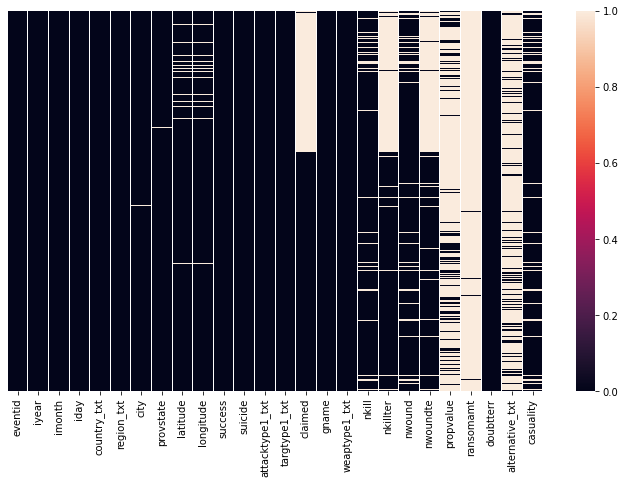

In [ ]:
#Let's have a look at NaN value distribution:
plt.figure(figsize=(12,7))
sns.heatmap(gtd_global.isnull(), yticklabels=False)
plt.show()

We can observe that following are the fields with most NaN values:

1. It can be observed that ransomamt(ransom amount demanded), propvalue(property damages), nwoundte(perpetrators wounded), nkillter( perpetrators killed), alternative_txt are the fields with high concentration of NaN values.
2. So it can be inferred that these informations regarding a terrorist attacks are difficult to get hold of.

In [ ]:
#cleaning up the NaN values.
gtd_global['country_txt'].fillna('Unknown',inplace=True)
gtd_global['region_txt'].fillna('Unknown',inplace=True)
gtd_global['city'].fillna('Unknown',inplace=True)
gtd_global['provstate'].fillna('Unknown',inplace=True)
gtd_global['nwoundte'].fillna(0,inplace=True)
gtd_global['ransomamt'].fillna('Unknown',inplace=True)
gtd_global['success'].fillna('Unknown',inplace=True)
gtd_global['suicide'].fillna('Unknown',inplace=True)
gtd_global['attacktype1_txt'].fillna('Unknown',inplace=True)
gtd_global['targtype1_txt'].fillna('Unknown',inplace=True)
gtd_global['gname'].fillna('Unknown',inplace=True)
gtd_global['claimed'].fillna(0,inplace=True) #You can't really 'not know' if its claimed. I'm taking the liberty to assume the NaN values here are unclaimed.
gtd_global['weaptype1_txt'].fillna('Unknown',inplace=True)
gtd_global['nkill'].fillna(0,inplace=True)
gtd_global['nwound'].fillna(0,inplace=True)
gtd_global['propvalue'].fillna(0,inplace=True)
gtd_global['nkillter'].fillna(0,inplace=True)
gtd_global['alternative_txt'].fillna('unknown',inplace=True)
gtd_global['doubtterr'].fillna(0,inplace=True)
gtd_global['latitude'].fillna(0,inplace=True)
gtd_global['longitude'].fillna(0,inplace=True)
gtd_global['casuality'].fillna(0,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


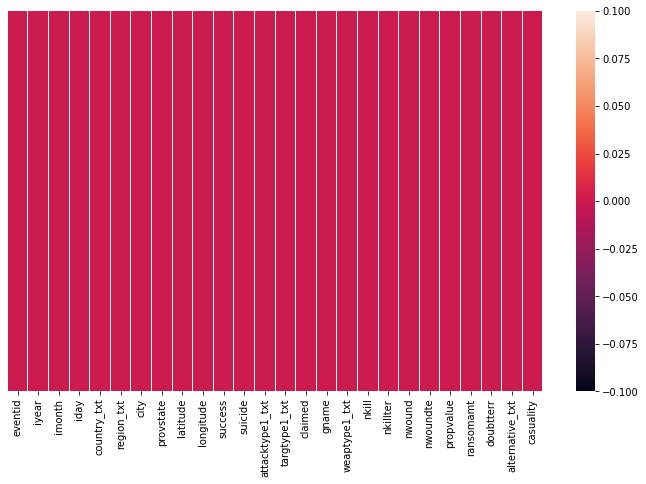

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(gtd_global.isnull(), yticklabels=False)
plt.show()

NaN values are cleared from the dataframe

In [ ]:
#renaming the columns
gtd_global.rename(columns={'iyear':'year',
                           'imonth':'month',
                           'iday':'day',
                           'country_txt':'country',
                           'region_txt':'region',
                           'provstate':'state',
                           'attacktype1_txt':'attack_type',
                           'targtype1_txt':'target_type',
                           'gname':'organisation',
                           'weaptype1_txt':'weapon_type',
                           'nwoundte':'perpetrator_wounded',
                           'ransomamt':'ransom_amount',
                           'nkillter':'perpetrator_killed',
                           'doubtterr':'doubt_terror'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#adding casuality column to the data frame. Casulities= nwound+casuality
gtd_global['casuality']=gtd_global.nkill+gtd_global.nwound

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#creating subsets for the regional and national level analysis
gtd_SA=gtd_global[gtd_global.region=='South Asia']
gtd_india=gtd_global[gtd_global.country=='India']


#The globe at a glance

Let's take a step back and have a look at the situation

In [ ]:
#creating a df with frequency of attacks grouped by countries
gtd_country=gtd_global.groupby('country')['eventid'].count().reset_index() #this would give us total number of attack in each country over the time

gtd_country_timeline=gtd_global.groupby(['year','country'])['eventid'].count().reset_index() # this dataframe would help us with a timeline of every year since 1970

global_timeline=gtd_global.groupby('year')['eventid'].count().reset_index().rename(columns={'eventid':'attack_count'})
global_timeline['casualities']=gtd_global.groupby('year')['casuality'].sum().reset_index()['casuality']



In [ ]:
#visualisation
total_attacks=px.choropleth( gtd_country,locations='country',locationmode='country names',color='eventid',
                            template='plotly_dark', hover_name='country',projection='orthographic',
                            title='Total number of attacks(1970-2017)',
                            color_continuous_scale = px.colors.sequential.Blugrn,
                            labels={'eventid':'attacks'})

total_attacks.show()


timeline=px.choropleth(gtd_country_timeline,locations='country',locationmode='country names',color='eventid',template='plotly_dark',
                  hover_name='country',title='Time line of attacks in each year from 1970 to 2017',
                  color_continuous_scale = px.colors.sequential.Blugrn,
                  animation_frame='year',
                  labels={'eventid':'attacks'})
print('use the animation frame below to navigate through years')
timeline.show()


treemap=px.treemap(data_frame=gtd_global,
           template='plotly_dark',
           values='casuality',
           path=['region','country','state'],
           color_discrete_sequence=px.colors.sequential.Blugrn,
           title='Treemap segregated by region, country and state, with casualities as values',
          

           )
print('following is an interactive tree map. Click on a region to break it down to countries and further down to states.')
treemap.show()

timeline=px.line(data_frame=global_timeline,y=['attack_count','casualities'],x='year',template='plotly_dark')
timeline.show()

use the animation frame below to navigate through years


following is an interactive tree map. Click on a region to break it down to countries and further down to states.


**Remarks**
1. It's evident from the figure that the terrorist attacks are quite concentrated in a handful of countries like Afghanistan, Pakistan, Iraq, India etc.
2. Middle East & North Africa is the region with most casualities, followed by South Asia, Sub-Saharan Africa, South America and so on. Iraq is the country with most number of reported casualities: 213,279.

3. The attack frequency over the world, peaked in the year 2014: 16903 attacks The casualities due to terrorism peaked in the same year: 85618 casualities.


Doubt Terrorism... ?

There are instances when some incidents do not match any two of the 3 criterions set by START to qualify as a terrorist attack. Such incidents are marked 1 in the 'doubtterr' field in the data set, implying that there is some amount of doubt as to whether this was an act of terrorism.

In [ ]:
fig=px.sunburst(gtd_global,
                                  template='plotly_dark',
                                  path=['doubt_terror','alternative_txt'],
                                  color_discrete_sequence=px.colors.qualitative.Dark24,
                                  title='Doubt terrorism')

fig.show()

**Remarks**
1. 138,906 attacks are such that there is no essential doubt in them being a terrorist attack.
2. 29001 attacks are such that they can't be classified as terrorist attack under START criterions. They are classified into follows:
    
    1. Insurgency/ Guerilla Action: 23,408
    2. Lack of intentionality: 319
    3. State Actors: 321
    4. Intra/Inter group conflict: 1296
    5. Other crime type: 3657 

Wordcloud of organisations over the globe

In [ ]:
#df with organisations and corresponding frequency of attacks
global_org_frequency=gtd_global.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [ ]:
#creating dictionary with group names and corresponding frequency of attacks. We'll be using this dictionary to generate the wordlcoud
global_organisation_dict={}
for group,attacks in zip(global_org_frequency.organisation,global_org_frequency.attacks):
  global_organisation_dict[group]=attacks

In [ ]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=global_organisation_dict)
plt.figure(figsize=(23,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordcloud of organisations dominant over the globe')
plt.axis("off")
plt.show()



**Remarks**

1. The Unknown faction contributes the most to the number of attacks over the world. These could be the attacks, not claimed by any organisations, work of individuals or group of individuals who do not belong to any formal organisation.

2. Taliban has the upperhand in terms of absolute number of attacks all over the world.

**Region wise drill down**

In [ ]:
#Terrorist attacks in different regions year wise
region_crosstab=pd.crosstab(gtd_global['year'], gtd_global['region']) #We'll use the cross tab to generate line chart

In [ ]:
# Using 'groupby' to create the required Data Frame
gtd_regions_casualties = gtd_global.groupby('region')['nkill','perpetrator_killed','nwound','perpetrator_wounded'].sum()

In [ ]:
#adding number of attacks to the dataframe
gtd_regions_casualties['Attacks']=gtd_global['region'].value_counts()

In [ ]:
#renaming columns, sorting values and reseting index.
gtd_regions_casualties.rename(columns={'nkill':'total_deaths','nwound':'total_wounded'},inplace=True)
gtd_regions_casualties.sort_values('Attacks',ascending=False,inplace=True)
gtd_regions_casualties.reset_index(inplace=True)

In [ ]:
region_crosstab.columns

In [ ]:
pd.crosstab(gtd_global.year, gtd_global.region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region (1970-2017)')
plt.ylabel('Number of Attacks')
plt.show()

#tabular visualisation
table_region_casualities= go.Figure(data=[go.Table(  
        header=dict(values=list(gtd_regions_casualties.columns),
                fill_color='pink',
                align='left'),
    cells=dict(values=[gtd_regions_casualties.region,gtd_regions_casualties.total_deaths,gtd_regions_casualties.perpetrator_killed,gtd_regions_casualties.total_wounded,gtd_regions_casualties.perpetrator_wounded,gtd_regions_casualties.Attacks],
               fill_color='lavender',
               align='left'))
])
table_region_casualities.show()

**Attack Types**

In [ ]:
gtd_attack_type=gtd_global.groupby('attack_type')['eventid'].count().reset_index().rename(columns={'eventid':'attack_count'})
gtd_attack_type['casuality']=gtd_global.groupby('attack_type')['casuality'].sum().reset_index()['casuality']

In [ ]:
px.pie(data_frame=gtd_attack_type,names='attack_type',values='attack_count',color='attack_type',hover_data=['casuality'],title='Distribution of attack types')

In [ ]:
global_attacks=gtd_global['attack_type'].value_counts()
global_attacks

In [ ]:
labels=global_attacks
fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))
plt.pie(labels, startangle=90, autopct='%.2f%%')
plt.title('Types Of Terrorist Attacks',fontsize=30)
plt.legend(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'],loc='upper right',bbox_to_anchor = (1.3,0.9), fontsize=12)
plt.show()

**Target types**

In [ ]:
gtd_target_types=gtd_global.groupby('target_type')['eventid'].count().reset_index().rename(columns={'eventid':'attack_count'}).sort_values('attack_count',ascending=False)
gtd_target_types

In [ ]:
global_target=gtd_global['target_type'].value_counts()
global_target

In [ ]:
global_target.plot(kind='barh')

plt.xlabel("Number of targets")
plt.ylabel("Types of target")
plt.title("Terrorist targets over the world")

plt.rcParams['figure.figsize']=(15,10)

#South Asia at a glance

As observed in previous set of analysis, South Asia is the second most affected region after Middle East and North Africa. Let's have a glance at situation in South Asia.

In [ ]:
#Attacks in different countries in South Asia over the year
southasia_nations = gtd_SA['country'].value_counts()
southasia_nations

In [ ]:
# Horizontal Bar Graph to show attacks in different South Asian nations over the year
plt.figure(figsize=(12,8))
plt.title("Total Terrorists Attacks in different South Asian Countries from 1970-2017")
plt.ylabel('Countries')
plt.xlabel('Total Attacks')
plt.xticks(np.arange(0,20000,1000))
southasia_nations.plot(kind='barh')
plt.show()

**Remarks**

Pakistan is the most affected country in South Asian region, followed by Afghanistan and India.

In [ ]:
#df with organisation and corresponding frequency of attacks
SA_org_frequency=gtd_SA.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [ ]:
organisation_sth_asia_dict={} #We'll use this dict to generate the wordcloud
for group,attacks in zip(SA_org_frequency.organisation,SA_org_frequency.attacks):
  organisation_sth_asia_dict[group]=attacks

In [ ]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=organisation_sth_asia_dict)
plt.figure(figsize=(23,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordclouds of organisations dominant over South Asia')
plt.axis("off")
plt.show()
print("Word cloud of group attack frequencies across South East Asia")

**Remarks**
1. Unknown faction has the highest contribution to number of attacks in South Asian Region. These could be the attacks, not claimed by any organisation, work of inidviduals or group of individuals who do not belong to a formal organisation.
2. Taliban again, comes up at top of the chart in South Asia, followed by CPI-Maoists, LTTE, TTP etc.

**Targets**

In [ ]:
SA_target_types=gtd_SA.groupby('target_type')['eventid'].count().reset_index().rename(columns={'eventid':'attack_count'}).sort_values('attack_count',ascending=False)

In [ ]:
SA_target=gtd_SA['target_type'].value_counts()
global_target

In [ ]:
SA_target.plot(kind='barh')

plt.xlabel("Number of targets")
plt.ylabel("Types of target")
plt.title("Terrorist targets over the world")

plt.rcParams['figure.figsize']=(15,10)

**Remarks**

1. Private citizens and properties is the most common target for terrorists, followed by Police, Military, Government, and Business.

#India at a glance
Let's look at the situation in India, and where it stands in comparison with other countries.

In [ ]:
india_timeline=gtd_india.groupby('year')['eventid'].count().reset_index().rename(columns={'eventid':'attack_count'})
india_timeline['casuality']=gtd_india.groupby('year')['casuality'].sum().reset_index()['casuality']

In [ ]:
india_timeline

In [ ]:
# Plotting a Graph to compare the attacks in India and rest of other countries in South Asia (exluding India) over the years
plt.figure(figsize=(15,9))

plt.plot(india_timeline.attack_count)
plt.plot(india_timeline.casuality )


plt.legend(['Attacks in South Asia (Excluding India)','Attacks in India'],fontsize = 15)

plt.title("Comparing the Terrorists Attacks in All South Asian countries (exluding India) with India from 1970-2019")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2018,1))
plt.yticks(np.arange(0,5000,200))
plt.plot()

**Remarks**

1. India has had over 11960 attacks since 1970, till 2017 and these attacks have resulted in over 48321 casualities
3. The attack frequency peaked in the year 2016 with a count of 1025 attacks and the casualities peaked in the year 2006 with a total of 2860 casualities.

**Major Organisations**

In [ ]:
india_org_frequency=gtd_india.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [ ]:
organisation_india_dict={}
for group,attacks in zip(india_org_frequency.organisation,india_org_frequency.attacks):
  organisation_india_dict[group]=attacks

In [ ]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=organisation_india_dict)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordclouds of organisations dominant over India')
plt.axis("off")
plt.show()

**Remarks**
1. Communist Party of India(Maoists) is the most dominant group in India followed by Sikh Extremists, Maoists etc

**Target types**

In [ ]:
india_target_types=gtd_india.groupby('target_type')['eventid'].count().reset_index().rename(columns={'eventid':'attack_count'}).sort_values('attack_count',ascending=False)

In [ ]:
india_target_types

In [ ]:
india_target=gtd_india['target_type'].value_counts()
india_target

In [ ]:
india_target.plot(kind='barh')

plt.xlabel("Number of targets")
plt.ylabel("Types of target")
plt.title("Terrorist targets over the world")

plt.rcParams['figure.figsize']=(15,10)

**Remarks**

Private citizens followed by Police, Government, Business and Military are the most sought after targets by the terrorists in India.

Drilling down State Wise

In [ ]:
# Knowing the number of attacks that happened in different states of India
indStates_attack =gtd_india['state'].value_counts()
indStates_attack.sort_index(inplace=True)
indStates_attack

In [ ]:
#Creating a series of percentage of attacks happend in every state
indStates_attack_percent = indStates_attack.apply(lambda x: (x*100/sum(indStates_attack)))

In [ ]:
# Renaming the required series
indStates_attack.rename(index='Number_of_Attacks', inplace=True)
indStates_attack_percent.rename(index='Percentage_of_Attacks', inplace=True)

In [ ]:
indStates_attack_df = pd.concat([indStates_attack,indStates_attack_percent], axis=1)
indStates_attack_df.reset_index(inplace=True)
indStates_attack_df.rename(columns={'index':'State/UT'},inplace=True)
indStates_attack_df.sort_values(by='Percentage_of_Attacks', ascending=False,inplace=True)

In [ ]:
# Creating a required list of percent of attacks that every state encountered for large attacks and combining the rest of attacks into one value for small percentage of attacks
other_attacks = []
a = 0
for i in indStates_attack_percent.sort_values(ascending=False):
  if i>5:
    other_attacks.append(i)
  else:
    a = a + i
other_attacks.append(a)
print(other_attacks)

In [ ]:
#Creating a list of states that encountered the large number of attacks
other_states = 'Attacks in Other States/UTs'
labels = list(indStates_attack_percent.sort_values(ascending=False)[:len(other_attacks[:-1])].keys())
labels.append(other_states)
print(labels)

In [ ]:
state_percentage=pd.DataFrame(list (zip(labels,other_attacks)),columns=['State/UT','Percentage'])
state_percentage

In [ ]:
px.pie(state_percentage,values='Percentage',names='State/UT',title='Contribution of States to total attacks in India')

**Remarks**
1. We can observe that J&K contributes over 20.5% of the total attacks that has happened in India followed by Assam, Manipur, Chhatisgarh, Punjab, Jharkhand, Bihar and West Bengal.
2. Rest of the states together amounts to 25.9 %.

#India Vs South Asia

In [ ]:
# South Asian DataFrame exluding India
SA_not_ind = gtd_SA[gtd_SA['country']!='India']

# Attacks in South Asia (exluding India) over the years
SA_not_ind_timeline = SA_not_ind['year'].value_counts()
SA_not_ind_timeline.sort_index(inplace=True)
SA_not_ind_timeline

# Renaming the series Index for attacks in South Asia (excluding India) over the years.
SA_not_ind_timeline.rename(index='Attacks_in_SouthAsia_excluding_India', inplace=True)


#Creating a series to know the number of attacks in India over the years
ind_attack = gtd_india['country'].value_counts()
ind_timeline = gtd_india['year'].value_counts()
ind_timeline.sort_index(inplace=True)
ind_timeline

#Renaming the series Index for attacks in India over the years
ind_timeline.rename(index='Attacks_in_India', inplace=True)

compare_attacks_df= pd.concat([ind_timeline, SA_not_ind_timeline], axis=1)

# Making index the new column named 'Year'
compare_attacks_df.reset_index(inplace=True)
compare_attacks_df = compare_attacks_df.rename(columns={'index':'Year'})

# Replacing NaN values from the "compare_attacks_df" and changing the datatype from "float" to "int"
compare_attacks_df['Attacks_in_India'].fillna(0, inplace=True)
compare_attacks_df['Attacks_in_SouthAsia_excluding_India'].fillna(0, inplace=True)
compare_attacks_df = compare_attacks_df.astype(int)

#adding average number of attacks per country in South Asia(Excluding India)
compare_attacks_df['SouthAsia_avg_per_country']=compare_attacks_df['Attacks_in_SouthAsia_excluding_India']/8 #since there are 8 non indian countries in South Asia

compare_attacks_df

In [ ]:
# Plotting a Graph to compare the attacks in India and rest of other countries in South Asia (exluding India) over the years
plt.figure(figsize=(15,9))

plt.plot(compare_attacks_df.Attacks_in_India)
plt.plot(compare_attacks_df.Attacks_in_SouthAsia_excluding_India)
plt.plot(compare_attacks_df.SouthAsia_avg_per_country)

plt.legend(['Attacks in South Asia (Excluding India)','Attacks in India'],fontsize = 15)

plt.title("Comparing the Terrorists Attacks in All South Asian countries (exluding India) with India from 1970-2019")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2018,1))
plt.yticks(np.arange(0,5000,200))
plt.plot()

**Remarks**
1. It can be observed that there were quite a few instances in late 80s and 90s, where the number of attacks in India alone were higher than the rest of the South Asia Combined.

2. India has always had more attacks than average attacks per country in rest of South Asia. 

#The Legacy: Exploring the terrorist attacks in India, Pakistan and Afghanistan

#### India

In [ ]:
sns.set(style="ticks", context="talk")
plt.style.use("seaborn")
plt.rcParams['figure.figsize']=[25,10]

In [ ]:
# Creating a Data Frame for India
ind_df = gtd_global.loc[gtd_global['country']=='India']

In [ ]:
#Creating a series to know the number of attacks in India over the years
ind_attack = ind_df['country'].value_counts()
ind_attack_years = ind_df['year'].value_counts()
ind_attack_years.sort_index(inplace=True)
ind_attack_years

In [ ]:
#Plotting a line graph to get the information about the number of attacks in India over the year
plt.figure(figsize=(15,9))
plt.plot(ind_attack_years)
plt.title("Terrorist Attacks in India from 1970-2017")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,1100,50))

plt.xticks(rotation=90)
plt.show()

#### Pakistan

In [ ]:
# Creating a DataFrame for Pakistan
pak_df = gtd_global.loc[gtd_global['country']=='Pakistan']

In [ ]:
# Creating a Series to know the number of attacks in Pakistan over the year
pak_attack = pak_df['country'].value_counts()
pak_attack_years = pak_df['year'].value_counts()
pak_attack_years.sort_index(inplace=True)
pak_attack_years

In [ ]:
#Plotting a line graph to get the information about the number of attacks in Pakistan over the year
plt.figure(figsize=(15,9))
plt.plot(pak_attack_years)
plt.title("Terrorist Attacks in Pakistan from 1970-2017")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,2500,100))

plt.xticks(rotation=90)
plt.show()

#### Afghanistan

In [ ]:
#Creating a Data Frame for Afghanista
afg_df = gtd_global.loc[gtd_global['country']=='Afghanistan']

In [ ]:
#Creating a Series to know the number of attacks in Afghanistan over the years
afg_attack = afg_df['country'].value_counts()
afg_attack_years = afg_df['year'].value_counts()
afg_attack_years.sort_index(inplace=True)
afg_attack_years

In [ ]:
#Plotting a line graph to get the information about the number of attacks in Afghanistan over the year
plt.figure(figsize=(15,9))
plt.plot(afg_attack_years)
plt.title("Terrorist Attacks in Afghanistan from 1970-2017")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,2100,100))

plt.xticks(rotation=90)
plt.show()

#### India, Pakistan, Afghanistan: Terrorist attack Data Frame

In [ ]:
# Creating a combined Data Frame for India, Pakistan and Afghanistan
ind_attack_years_renamed = ind_attack_years.rename(index='Attacks_in_India')
pak_attack_years_renamed = pak_attack_years.rename(index='Attacks_in_Pakistan')
afg_attack_years_renamed = afg_attack_years.rename(index='Attaks_in_Afghanistan')

ind_pak_afg_df = pd.concat([ind_attack_years_renamed, pak_attack_years_renamed, afg_attack_years_renamed], axis=1)

In [ ]:
# Filling the NaN values from the "ind_pak_afg_df"
ind_pak_afg_df['Attacks_in_India'].fillna(0, inplace=True)
ind_pak_afg_df['Attacks_in_Pakistan'].fillna(0, inplace=True)
ind_pak_afg_df['Attaks_in_Afghanistan'].fillna(0, inplace=True)

In [ ]:
# Converting the 'Float' datatype of DataFrame into 'int' datatype
ind_pak_afg_df = ind_pak_afg_df.astype(int)

In [ ]:
ind_pak_afg_df

In [ ]:
# Plotting the graph for the attacks in India, Pakistan and Afghanistan over the year
plt.figure(figsize=(15,9))

plt.plot(ind_pak_afg_df)
plt.legend(['India','Pakistan','Afghanistan'])

plt.title("Terrorists Attacks in India, Pakistan and Afghanistan from 1970-2019")
plt.xlabel('Years')
plt.ylabel('Total Attacks')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2019,1))
plt.yticks(np.arange(0,2500,100))
plt.plot()

#### Ploting a Stack Plot for attacks in India, Pakistan and Afghanistan


In [ ]:
#Getting all the required lists
x_label = list(ind_pak_afg_df.index)
ind_list = list(ind_pak_afg_df['Attacks_in_India'])
pak_list = list(ind_pak_afg_df['Attacks_in_Pakistan'])
afg_list = list(ind_pak_afg_df['Attaks_in_Afghanistan'])

In [ ]:
# Stack Plot for attacks
plt.figure(figsize=(15,9))
labels = ['India', 'Pakistan', 'Afghanistan']
colors = ['b','g','r']
plt.stackplot(x_label, ind_list, pak_list, afg_list, labels = labels, colors = colors)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.xticks(np.arange(1970,2020,1))
plt.yticks(np.arange(0,5000,500))
plt.plot()

#Success

**Success Parameters**

All the attacks in the data set are classified under 8 different types of attacks:

1. Assassination	
2. Armed Assault
3. Bombing/Explosion	
4. Facility/Infrastructure Attack	
5. Hijacking	
6. Hostage Taking (Kidnapping)	
7. Hostage Taking (Barricade Incident)	
8. Unarmed Assault
9. Unknown

The parameters that define whether or not these attack types were succesful differs from one to other. Let's have a look at success parameter of each attack type:

1.**ASSASSINATION**

In order for an assassination to be successful, the target of the assassination must be killed. For example, even if an attack kills numerous people but not the target, it is an unsuccessful assassination.

2.**ARMED ASSAULT**

An armed assault is determined to be successful if the assault takes place and if a target is hit (including people and/or property). Unsuccessful armed assaults are those in which the perpetrators attack and do not hit the target. An armed assault is also unsuccessful if the perpetrators are apprehended on their way to commit the assault. To make this determination, however, there must be information to indicate
that an actual assault was imminent.

3.**BOMBING/EXPLOSION**

A bombing is successful if the bomb or explosive device detonates. Bombings are considered unsuccessful if they do not detonate. The success or failure of the bombing is not based on whether it hit the intended target.

4.**HIJACKING**

A hijacking is successful if the hijackers assume control of the vehicle at any point, whereas a hijacking is unsuccessful if the hijackers fail to assume control of the vehicle. The success or failure of the hijacking is not based on whether the vehicle reached the intended destination of the hijackers.

5.**HOSTAGE TAKING (BARRICADE INCIDENT)**

A barricade incident is successful if the hostage takers assume control of the individuals at any point, whereas a barricade incident is unsuccessful if the hostage takers fail to assume control of the individuals.

6.**HOSTAGE TAKING (KIDNAPPING)**

A kidnapping is successful if the kidnappers assume control of the individuals at any point, whereas a kidnapping is unsuccessful if the kidnappers fail to assume control of the individuals.

7.**FACILITY / INFRASTRUCTURE ATTACK**

A facility attack is determined to be successful if the facility is damaged. If the facility has not been damaged, then the attack is unsuccessful.

8.**UNARMED ASSAULT**

An unarmed assault is determined to be successful if there is a victim who has been injured. Unarmed assaults that are unsuccessful are  those in which the perpetrators do not injure anyone. An unarmed assault is also unsuccessful if the perpetrators are apprehended when on their way to commit the assault. To make this determination, however, there must be information to indicate that an assault
was imminent.



---
Source: GTD Codebook.



Which organisation has the highest success rate?

In [ ]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.rcParams['figure.figsize']=[25,10]

In [ ]:
#Global
sns.countplot(data=gtd_global,x='year',hue='success',color='brown')
plt.title('Succesful and unsuccesful attacks, all over the globe, over the years')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#South Asia
sns.countplot(x='year',hue='success',data=gtd_SA,color='brown')
plt.title('Succesful and unsuccesful attacks, all over South Asia, over the years')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#India
sns.countplot(x='year',hue='success',data=gtd_india,color='brown')
plt.title('Succesful and unsuccesful attacks, all over India, over the years')
plt.xticks(rotation=90)
plt.show()


**Remarks**

1. A common trend can be observced at all three levels that the number of succesful attacks have been on a gradual increase over the time.
2. But the unsuccesful attacks, or in other words our ability to render those attacks unsuccesful has not been able to keep up with the rise in terrorism. In brief one could say, Terrorism has been winning over the years.

**Success rates of organisation?**
Are the ones with high number of attacks more succesful too?


In [ ]:
#Sorting the attack fequencies in descending order
global_org_frequency.sort_values('attacks',ascending=False,inplace=True)
india_org_frequency.sort_values('attacks',ascending=False,inplace=True)
SA_org_frequency.sort_values('attacks',ascending=False,inplace=True)

In [ ]:
#creating df with number of succesful attacks
global_org_success=gtd_global.groupby('organisation')['success'].sum().reset_index().sort_values('success',ascending=False)#Since the succesful attacks has been represented by 
                                                                                                                           #1,the sum woud give us total number of succesful attacks
SA_org_success=gtd_SA.groupby('organisation')['success'].sum().reset_index().sort_values('success',ascending=False)

india_org_success=gtd_india.groupby('organisation')['success'].sum().reset_index().sort_values('success',ascending=False)

In [ ]:
#reseting index of the organisation frequency df and group_success_df to be able to merge df going forwards
global_org_frequency.reset_index(drop=True,inplace=True)
global_org_success.reset_index(drop=True,inplace=True)

SA_org_frequency.reset_index(drop=True,inplace=True)
SA_org_success.reset_index(drop=True,inplace=True)

india_org_frequency.reset_index(drop=True,inplace=True)
india_org_success.reset_index(drop=True, inplace=True)

In [ ]:
#adding attack column to the succes data frame 
global_org_success['attacks']=global_org_frequency.attacks
SA_org_success['attacks']=SA_org_frequency.attacks
india_org_success['attacks']=india_org_frequency.attacks

In [ ]:
#sorting on basis of oganisation to maintain consistency. We will sort the df on basis of attacks later on when everything is settled
global_org_success.sort_values('organisation',inplace=True)
SA_org_success.sort_values('organisation',inplace=True)
india_org_success.sort_values('organisation',inplace=True)

In [ ]:
#calculating succes rate= number of succesful attacks / number of total attacks * 100
global_org_success['succes_rate_percentage']=round((global_org_success.success/global_org_success.attacks)*100,2)
india_org_success['succes_rate_percentage']=round((india_org_success.success/india_org_success.attacks)*100,2)
SA_org_success['succes_rate_percentage']=round((SA_org_success.success/SA_org_success.attacks)*100,2)

Now our succes rate dataframe is ready. Let's take a look at one of them

In [ ]:
global_org_success.head()

So the dataframe is currently sorted on basis of organisation name. We need a more sensible parameter instead. We can look at the organisations with highest succes rate probably?
But there are quite a few organisations with very low number of attack frequency, and they are bound to have a high succes rate owing to that. For instance, an organisation has carried out 1 attack and that's succesful! WHOA! 100% succes rate! (No, not quite so :/). So success rate isn't the parameter we should be sorting them on.

Attack frequency is. We should be looking at succes rate of organisation with high number of attacks. Let's get to that.

In [ ]:
print("Groups with highest attack frequency over the globe, and their success rate")
global_org_success.sort_values('attacks',ascending=False,inplace=True)
global_org_success.head(6)

In [ ]:
print("Groups with highest attack frequency over south Asia, and their success rate")
SA_org_success.sort_values('attacks',ascending=False,inplace=True)
SA_org_success.head(6)

In [ ]:
print("Groups with top 5 highest attack frequency in India, and their success rate")
india_org_success.sort_values('attacks',ascending=False,inplace=True)
india_org_success.head(6)

Let's put up some visualisations for these

In [ ]:
plt.style.use('seaborn-bright')

In [ ]:
#plotting succes rates across the globe, South Asia and India
plt.rcParams['figure.figsize']=[15,5]

#global
sns.barplot(x=global_org_success[:6].organisation, #bar plot
            y=global_org_success[:6].succes_rate_percentage,
            palette='Dark2')
plt.title('Success rate of top 6 organisations globally')
plt.xlabel("Organisations")
plt.ylabel("Success rate")
plt.xticks(rotation=90)
plt.show()

table_global = go.Figure(data=[go.Table(  #tabular representation
    header=dict(values=list(global_org_success.columns),
                fill_color='pink',
                align='left'),
    cells=dict(values=[global_org_success[:6].organisation, global_org_success[:6].success, global_org_success[:6].attacks,global_org_success[:6].succes_rate_percentage],
               fill_color='lavender',
               align='left'))
])
table_global.show()



In [ ]:
#south asian
sns.barplot(x=SA_org_success[:6].organisation,y=SA_org_success[:6].succes_rate_percentage,palette='Dark2')
plt.title('Success rate of top 6 organisations in South East Asia')
plt.xlabel("Organisations")
plt.ylabel("Success rate")
plt.xticks(rotation=90)
plt.show()

table_SA = go.Figure(data=[go.Table(
    header=dict(values=list(SA_org_success.columns),
                fill_color='pink',
                align='left'),
    cells=dict(values=[SA_org_success[:6].organisation, SA_org_success[:6].success, SA_org_success[:6].attacks,SA_org_success[:6].succes_rate_percentage],
               fill_color='lavender',
               align='left'))
])
table_SA.show()

In [ ]:
#India
sns.barplot(x=india_org_success[:6].organisation,y=india_org_success[:6].succes_rate_percentage,palette='Dark2')
plt.title('Success rate of top 6 organizations in India')
plt.xlabel("Organizations")
plt.ylabel("Success rate")
plt.xticks(rotation=90)
plt.show()

table_india = go.Figure(data=[go.Table(
    header=dict(values=list(india_org_success.columns),
                fill_color='pink',
                align='left'),
    cells=dict(values=[india_org_success[:6].organisation, india_org_success[:6].success, india_org_success[:6].attacks,india_org_success[:6].succes_rate_percentage],
               fill_color='lavender',
               align='left'))
])
table_india.show()

**Remarks:**
From the analysis, we can see that the organisations with highest attack frequency are not essentially the most efficient ones. For instance, Farabundo Marti National Liberation Front (FMLN) on a global level has put up a significant 3351 number of attacks and has a success rate of over 98%.

So let's say if FMLN gets to scale it's resources to increase there attack frequency, they might prove to be more damage inducing in coming times. So these are the organisations we need to look out for in the future.

Same goes for Shining Path (SL) at global, Liberation Tigers of Tamil Eelam (LTTE) at south asian, and Sikh Extremists at Indian level, which has succes rates of over 90%.

**Success rates of different attack types**.

What is the succes rate that different attack types have yielded historically?

**Global**

In [ ]:
#creating df grouped by attack type and there frequency
global_attacktype_frequency=gtd_global.groupby('attack_type')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

#creating df of attack types that were successful
global_attacktype_success=gtd_global.groupby('attack_type')['success'].sum().reset_index().rename(columns={'success':'succesful_attacks'})

#resetting index 
global_attacktype_success.reset_index(drop=True,inplace=True)
global_attacktype_frequency.reset_index(drop=True,inplace=True)

In [ ]:
#sorting according to attack type so that total attacks and succesful attacks can match up
global_attacktype_frequency.sort_values('attack_type',inplace=True)
global_attacktype_success.sort_values('attack_type',inplace=True)

In [ ]:
#adding total attacks column to succesful_attacks df
global_attacktype_success['total_attacks']=global_attacktype_frequency['attacks']

In [ ]:
#adding succes rate columns to the succesful attacks df
global_attacktype_success['succes_rate_percentage']= round((global_attacktype_success.succesful_attacks / global_attacktype_success.total_attacks) *100,2)

In [ ]:
#sorting by success rate
global_attacktype_success.sort_values('succes_rate_percentage',ascending=False,inplace=True)

In [ ]:
global_attacktype_success

**South Asia**


In [ ]:
#creating df grouped by attack type and there frequency
SA_attacktype_frequency=gtd_SA.groupby('attack_type')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

#creating df of attack types that were successful
SA_attacktype_success=gtd_SA.groupby('attack_type')['success'].sum().reset_index().rename(columns={'success':'succesful_attacks'})

#resetting index 
SA_attacktype_success.reset_index(drop=True,inplace=True)
SA_attacktype_frequency.reset_index(drop=True,inplace=True)

In [ ]:
#sorting according to attack type so that total attacks and succesful attacks can match up
SA_attacktype_frequency.sort_values('attack_type',inplace=True)
SA_attacktype_success.sort_values('attack_type',inplace=True)

In [ ]:
#adding total attacks column to succesful_attacks df
SA_attacktype_success['total_attacks']=SA_attacktype_frequency['attacks']

In [ ]:
#adding succes rate columns to the succesful attacks df
SA_attacktype_success['succes_rate_percentage']= round((SA_attacktype_success.succesful_attacks / SA_attacktype_success.total_attacks) *100,2)

In [ ]:
#sorting by success rate
SA_attacktype_success.sort_values('succes_rate_percentage',ascending=False,inplace=True)

In [ ]:
SA_attacktype_success

**India**

In [ ]:
#creating df grouped by attack type and there frequency
india_attacktype_frequency=gtd_india.groupby('attack_type')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

#creating df of attack types that were successful
india_attacktype_success=gtd_india.groupby('attack_type')['success'].sum().reset_index().rename(columns={'success':'succesful_attacks'})

#resetting index 
india_attacktype_success.reset_index(drop=True,inplace=True)
india_attacktype_frequency.reset_index(drop=True,inplace=True)

In [ ]:
#sorting according to attack type so that total attacks and succesful attacks can match up
india_attacktype_frequency.sort_values('attack_type',inplace=True)
india_attacktype_success.sort_values('attack_type',inplace=True)

In [ ]:
#adding total attacks column to succesful_attacks df
india_attacktype_success['total_attacks']=india_attacktype_frequency['attacks']

In [ ]:
#adding succes rate columns to the succesful attacks df
india_attacktype_success['succes_rate_percentage']= round((india_attacktype_success.succesful_attacks / india_attacktype_success.total_attacks) *100,2)

In [ ]:
#sorting by success rate
india_attacktype_success.sort_values('succes_rate_percentage',ascending=False,inplace=True)

In [ ]:
india_attacktype_success

In [ ]:
gtd_india.groupby('attack_type')['success'].sum()

In [ ]:
gtd_india.groupby('attack_type')['eventid'].count()

In [ ]:
#adding casuality column to the dataframes for being able to compare the casualities contributed by the attack types
global_attacktype_success['casuality']=gtd_global.groupby('attack_type')['casuality'].sum().reset_index()['casuality']
SA_attacktype_success['casuality']=gtd_SA.groupby('attack_type')['casuality'].sum().reset_index()['casuality']
india_attacktype_success['casuality']= gtd_india.groupby('attack_type')['casuality'].sum().reset_index()['casuality']



In [ ]:
fig_global=px.bar(data_frame=global_attacktype_success,
                  template='plotly_dark',
                  x='attack_type',y='succes_rate_percentage',
                  hover_data=['casuality'],color='casuality',
                  color_continuous_scale=px.colors.sequential.Darkmint,
                  title='Succes rates of attack types over the globe')


fig_SA=px.bar(data_frame=SA_attacktype_success,
              template='plotly_dark',
              x='attack_type',y='succes_rate_percentage',
              hover_data=['casuality'],color='casuality',
              color_continuous_scale=px.colors.sequential.Darkmint,
              title='Succes rates of attack types over South Asia')


fig_india=px.bar(data_frame=india_attacktype_success,
                 template='plotly_dark',
                 x='attack_type',y='succes_rate_percentage',
                 hover_data=['casuality'],color='casuality',
                 color_continuous_scale=px.colors.sequential.Darkmint,
                 title='Succes rates of attack types in India')

fig_global.show()
fig_SA.show()
fig_india.show()#adding casuality column to the dataframes for being able to compare the casualities contributed by the attack types
global_attacktype_success['casuality']=gtd_global.groupby('attack_type')['casuality'].sum().reset_index()['casuality']
SA_attacktype_success['casuality']=gtd_SA.groupby('attack_type')['casuality'].sum().reset_index()['casuality']
india_attacktype_success['casuality']= gtd_india.groupby('attack_type')['casuality'].sum().reset_index()['casuality']



**Remarks**

1. Hostage Taking(Barricade Incident), Hostage Taking(Kidnapping) has proved to be the most succesful attack type at both global and South Asian level and result in comparitively low casualities than other attack types. This can be attributed to the very nature of the attack type. Since the terrorist has the leverage of hostages, it pressurises the concerned authority to meet with the demands, hence resulting in high success rates.


2. Bombing and explosion, which is amongst the most used attack type, and accounts for most casualities, has yielded low success rates at all three levels. The success of an bombing/explosion attack is determined by whether the explosive detonated or not.



#Actions of major groups

1. Taliban has come out to be the organisation with most attack frequencies at global as well as South Asian level and CPI(Maoist) in India.
2. How much ground has these two organisations covered in terms of number of countries?
3. What are the attack types they predominantly use and what are the casuality statisitics for these organisation?

These statistics can be visually represented very efficiently using an interactive sun burst chart from plotly.express library. Let's have a look.

In [ ]:
#creating dataframes exclusive to Taliban and Maoists
gtd_global_taliban=gtd_global[gtd_global.organisation=='Taliban']# a subset of global dataset exclusive to Taliban
gtd_global_maoist=gtd_global[gtd_global.organisation=='Communist Party of India - Maoist (CPI-Maoist)'] #a subset of global dataset exclusive to CPI-Maoist

In [ ]:
fig_taliban=px.sunburst(gtd_global_taliban,values='casuality',
                path=['country','attack_type','weapon_type'],
                color_discrete_sequence=px.colors.qualitative.Dark24,
                title='Fatalities caused by Taliban in different countries, grouped by attack types, and weapon types',
                template='plotly_dark')

fig_maoists=px.sunburst(gtd_global_maoist,values='casuality',
                path=['country','attack_type','weapon_type'],
                color_discrete_sequence=px.colors.qualitative.Dark24,
                title='Fatalities caused by Maoists in different countries, grouped by attack types, and weapon types',
                template='plotly_dark')

fig_taliban.show()
fig_maoists.show()

Directions:

* In the above chart, the innermost circle represents the countries the organisation have caused casualities in. The area is determined by the number of casualities.


*   The second cocentric circle represents the attack type used to cause the casualities and finally the outermost circle represents the weapon type used
*   You can hover over the area to see the exact figures and click on area to generate sun burst chart of that specific parameter



  





**Remarks**

**Taliban**:
1. It's interesting to note that, even though Taliban has the highest contribution
to the total number of attacks in the world, they have caused casulaities in a total of just 3 countries: Afghanistan(57140 casualities), Pakistan (197 casualites) and Turkmenistan (5 casualities).
2. Taliban has caused most casualities using Bombing/Explosions (24650) followed by Armed Assaults (18901) and unknown attack types(7149).
3. Explosives (24639) and Firearms(17466) are the most common weapon types used by Taliban.


**CPI (Maoists):**
1. As expected, CPI-Maoists are most active in India(4007 casualities), and 2 casuality in Nepal.
2. They have caused most casualities using Armed Assaults(1848) followed by Bombing/Explosions (1164) and unknown attack types(437)
3. Firearms(1483) and Explosvies(1160) again, are the most common weapon types used by this organisation as well.


#Which organisation has covered the most ground?

Since the two groups which has highest frequency of attacks in global and Indian region are only concentrated in a single country, it made us curious about which organisation has covered most ground in terms of number of countries.

In [ ]:
#We are going to formulate a dataframe of global subset grouped by organisation and country, and group the resulting data frame by organisation as follows:
organisation_country_freq_df=gtd_global.groupby(['organisation','country'])['eventid'].count().reset_index()
organisation_country_freq_df.groupby('organisation')['country'].count().reset_index().sort_values('country',ascending=False)


It's found that, Muslim Extremists has covered the most ground followed by Gunmen and Separatists.

Let's have a look at their sunburst charts

In [ ]:
#Creating dataframes exclusive to aforementioned three organisations
gtd_muslim_extremists=gtd_global[gtd_global.organisation=='Muslim extremists']
gtd_gunmen=gtd_global[gtd_global.organisation=='Gunmen']
gtd_separatists=gtd_global[gtd_global.organisation=='Separatists']

In [ ]:
#creating sun burst chart for each of the three organisations
fig_muslim_extremists=px.sunburst(gtd_muslim_extremists,values='casuality',
                                  template='plotly_dark',
                                  path=['country','attack_type','target_type'],
                                  color_discrete_sequence=px.colors.qualitative.Dark24,
                                  title='Fatalities caused by Muslim Extremists in different countries, grouped by attack types and target types')

fig_muslim_extremists.show()

fig_gunmen=px.sunburst(gtd_gunmen,values='casuality',
                       template='plotly_dark',
                       path=['country','attack_type','target_type'],
                       color_discrete_sequence=px.colors.qualitative.Dark24,
                       title='Fatalities caused by Gunmen in different countries, grouped by attack types and target types')

fig_gunmen.show()

fig_separatists=px.sunburst(gtd_separatists,values='casuality',
                            template='plotly_dark',
                            path=['country','attack_type','target_type'],
                            color_discrete_sequence=px.colors.qualitative.Dark24,
                            title='Fatalities caused by Separatists in different countries, grouped by attack types and target types')

                
fig_separatists.show()

**Remarks**

These charts are very rich in data, and can be used to gather many insights. Here are the major ones that I found:

**Muslim Extremists:**


*   Countries caused casualities in : 51 
*   Country caused most casualities in: Syria; 600 casualities
*   Preferred Attack type: Bombing Explosions
*   Preferred weapon type: Explosives


**Gunmen:**


*   Countries caused casualities in : 50
*   Country caused most casualities in: India; 113 Casualities 
*   Preferred Attack type: Bombing Explosions
*   Preferred weapon type: Explosives


**Separatists:**



*   Countries caused casualities in : 30
*   Country caused most casualities in: Thailand; 1256 Casualities 
*   Preferred Attack type: Bombing Explosions
*   Preferred weapon type: Explosives














